# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i <= 50):
         set_count += 1
         record_count = 0

     # Create endpoint URL with each city
    city_url =f"{url}appid={weather_api_key}&q={city}&units={units}"
        
    #     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #     # Add 1 to the record count
    record_count += 1

    #     # Run an API request for each of the cities
    try:
    #         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        #print(city_weather)
        city_weather_json=city_weather.json()
        #print(city_weather_json)

    #         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name= city_weather_json["name"]
        city_lat = city_weather_json["coord"]["lat"]
        city_lng =city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

             # Append the City information into city_data list
        city_data.append({"City": city_name,
                            "Lat": city_lat, 
                               "Lng": city_lng, 
                               "Max Temp": city_max_temp,
                               "Humidity": city_humidity,
                               "Cloudiness": city_clouds,
                               "Wind Speed": city_wind,
                               "Country": city_country,
                               "Date": city_date
                             })

             #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

     # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 2 | taolanaro
City not found. Skipping...
Processing Record 1 of Set 2 | lagoa
Processing Record 2 of Set 2 | hobart
Processing Record 3 of Set 2 | cayenne
Processing Record 4 of Set 2 | muros
Processing Record 5 of Set 2 | rikitea
Processing Record 6 of Set 2 | kitakata
Processing Record 7 of Set 2 | karratha
Processing Record 8 of Set 2 | butaritari
Processing Record 9 of Set 2 | torbay
Processing Record 10 of Set 2 | beringovskiy
Processing Record 11 of Set 2 | tautira
Processing Record 12 of Set 2 | tres lagoas
Processing Record 13 of Set 2 | koumra
Processing Record 14 of Set 2 | busselton
Processing Record 15 of Set 2 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 2 | hambantota
Processing Record 17 of Set 2 | port alfred
Processing Record 18 of Set 2 | gisborne
Processing Record 19 of Set 2 | puerto ayora
Processing Record 20 of Set 2 | avarua
Processing Record 21 of Se

Processing Record 136 of Set 3 | coihaique
Processing Record 137 of Set 3 | tchamba
Processing Record 138 of Set 3 | nueva granada
Processing Record 139 of Set 3 | tacuarembo
Processing Record 140 of Set 3 | alegrete
Processing Record 141 of Set 3 | taltal
Processing Record 142 of Set 3 | kimitsu
Processing Record 143 of Set 3 | osakarovka
Processing Record 144 of Set 3 | kirakira
Processing Record 145 of Set 3 | potsdam
Processing Record 146 of Set 3 | acapulco
Processing Record 147 of Set 3 | napier
Processing Record 148 of Set 3 | pitea
Processing Record 149 of Set 3 | nizhneyansk
City not found. Skipping...
Processing Record 150 of Set 3 | viligili
City not found. Skipping...
Processing Record 151 of Set 3 | auki
Processing Record 152 of Set 3 | narsaq
Processing Record 153 of Set 3 | andevoranto
City not found. Skipping...
Processing Record 154 of Set 3 | saint george
Processing Record 155 of Set 3 | majene
Processing Record 156 of Set 3 | ishinomaki
Processing Record 157 of Set 3

Processing Record 316 of Set 3 | ca mau
Processing Record 317 of Set 3 | lasa
Processing Record 318 of Set 3 | beloha
Processing Record 319 of Set 3 | fort nelson
Processing Record 320 of Set 3 | tombouctou
Processing Record 321 of Set 3 | coquimbo
Processing Record 322 of Set 3 | rio claro
Processing Record 323 of Set 3 | pakhtakoron
Processing Record 324 of Set 3 | roebourne
Processing Record 325 of Set 3 | cody
Processing Record 326 of Set 3 | puerto escondido
Processing Record 327 of Set 3 | coahuayana
Processing Record 328 of Set 3 | meulaboh
Processing Record 329 of Set 3 | san ramon
Processing Record 330 of Set 3 | lorengau
Processing Record 331 of Set 3 | chiang klang
Processing Record 332 of Set 3 | casma
Processing Record 333 of Set 3 | puerto suarez
Processing Record 334 of Set 3 | provideniya
Processing Record 335 of Set 3 | sayyan
Processing Record 336 of Set 3 | half moon bay
Processing Record 337 of Set 3 | kununurra
Processing Record 338 of Set 3 | narasannapeta
Process

Processing Record 507 of Set 3 | villa rica
Processing Record 508 of Set 3 | south lake tahoe
Processing Record 509 of Set 3 | laguna
Processing Record 510 of Set 3 | jackson
Processing Record 511 of Set 3 | ichinomiya
Processing Record 512 of Set 3 | miraflores
Processing Record 513 of Set 3 | rio gallegos
Processing Record 514 of Set 3 | bengkalis
City not found. Skipping...
Processing Record 515 of Set 3 | kavieng
Processing Record 516 of Set 3 | paso de los toros
Processing Record 517 of Set 3 | coolum beach
Processing Record 518 of Set 3 | senlis
Processing Record 519 of Set 3 | lolua
City not found. Skipping...
Processing Record 520 of Set 3 | rongcheng
Processing Record 521 of Set 3 | fengzhen
Processing Record 522 of Set 3 | zhezkazgan
Processing Record 523 of Set 3 | bilma
Processing Record 524 of Set 3 | urdzhar
City not found. Skipping...
Processing Record 525 of Set 3 | palmer
Processing Record 526 of Set 3 | cao bang
Processing Record 527 of Set 3 | dalbandin
Processing Re

In [21]:
from pprint import pprint

In [22]:
pprint(city_weather_json)



{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 29.106, 'lon': 58.357},
 'dt': 1675552997,
 'id': 141736,
 'main': {'feels_like': 10,
          'grnd_level': 892,
          'humidity': 48,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 11.54,
          'temp_max': 11.54,
          'temp_min': 11.54},
 'name': 'Bam',
 'sys': {'country': 'IR', 'sunrise': 1675565605, 'sunset': 1675604858},
 'timezone': 12600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 217, 'gust': 1.42, 'speed': 0.59}}


In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,15.04,88,4,8.19,PT,1675552773
1,Hobart,-42.8794,147.3294,20.59,53,20,2.06,AU,1675552773
2,Cayenne,4.9333,-52.3333,24.02,94,75,1.03,GF,1675552773
3,Muros,42.7762,-9.0603,8.94,84,1,4.34,ES,1675552773
4,Rikitea,-23.1203,-134.9692,26.20,74,2,5.80,PF,1675552774


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Lagoa,39.0500,-27.9833,15.04,88,4,8.19,PT,1675552773
1,Hobart,-42.8794,147.3294,20.59,53,20,2.06,AU,1675552773
2,Cayenne,4.9333,-52.3333,24.02,94,75,1.03,GF,1675552773
3,Muros,42.7762,-9.0603,8.94,84,1,4.34,ES,1675552773
4,Rikitea,-23.1203,-134.9692,26.20,74,2,5.80,PF,1675552774


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

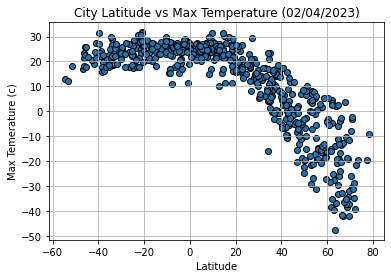

In [32]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Max Temperature (02/04/2023)")
plt.ylabel("Max Temerature (c)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

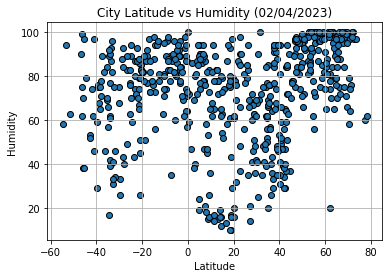

In [33]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Humidity (02/04/2023)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

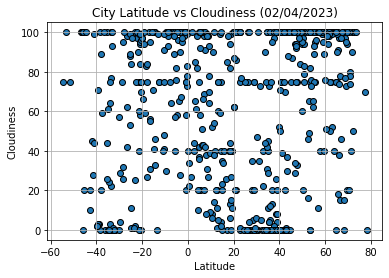

In [34]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Cloudiness (02/04/2023)")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

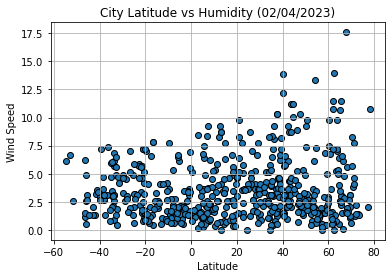

In [35]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Humidity (02/04/2023)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df= city_data_df.loc[(city_data_df)["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Lagoa,39.0500,-27.9833,15.04,88,4,8.19,PT,1675552773
2,Cayenne,4.9333,-52.3333,24.02,94,75,1.03,GF,1675552773
3,Muros,42.7762,-9.0603,8.94,84,1,4.34,ES,1675552773
5,Kitakata,37.6500,139.8667,-0.63,91,97,1.60,JP,1675552774
7,Butaritari,3.0707,172.7902,27.36,80,65,8.45,KI,1675552775


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df= city_data_df.loc[(city_data_df)["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Hobart,-42.8794,147.3294,20.59,53,20,2.06,AU,1675552773
4,Rikitea,-23.1203,-134.9692,26.20,74,2,5.80,PF,1675552774
6,Karratha,-20.7377,116.8463,31.73,45,58,1.50,AU,1675552774
10,Tautira,-17.7333,-149.1500,26.70,77,75,6.59,PF,1675552555
11,Três Lagoas,-20.7511,-51.6783,23.88,88,98,1.04,BR,1675552776


###  Temperature vs. Latitude Linear Regression Plot

R value: -0.8627619033202388


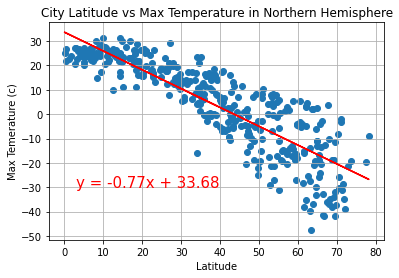

In [73]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red",xytext =(3, -30))
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Max Temperature in Northern Hemisphere")
plt.ylabel("Max Temerature (c)")
plt.xlabel("Latitude")
plt.grid()
print(f'R value: {rvalue}')

R value: 0.23853645623925715


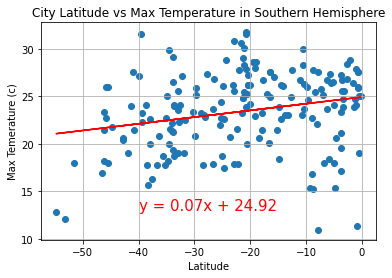

In [74]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-40,13), fontsize=15, color="red")

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Latitude vs Max Temperature in Southern Hemisphere")
plt.ylabel("Max Temerature (c)")
plt.xlabel("Latitude")
plt.grid()
print(f'R value: {rvalue}')

**Discussion about the linear relationship:** There is a strong negative correlation between the latitude and max temperature in the northern hemisphere. There is no significant correlation between latitute and max temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

R value: 0.39069108802144414


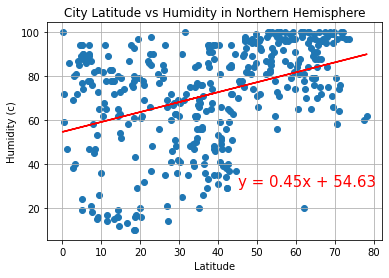

In [75]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red",xytext =(45, 30))
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Humidity in Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
print(f'R value: {rvalue}')

R value: 0.33577404987541


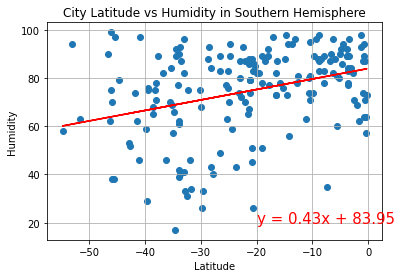

In [91]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-20,20), fontsize=15, color="red")

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Latitude vs Humidity in Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
print(f'R value: {rvalue}')

**Discussion about the linear relationship:** There is a weak positive correlation between latitude and humidity in both the northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

R value: 0.28972312858534505


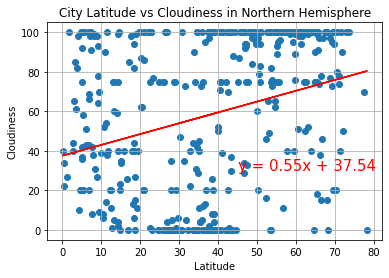

In [78]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red",xytext =(45, 30))
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Cloudiness in Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
print(f'R value: {rvalue}')

R value: 0.35381674254735096


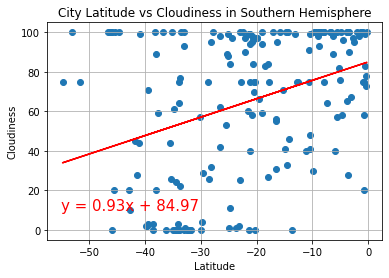

In [80]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red"
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Cloudiness in Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
print(f'R value: {rvalue}')

**Discussion about the linear relationship:** There is no significant correlation between latitude and cloudiness in the northern hemisphere and only a very weak correlation between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

R value: 0.07257130827633408


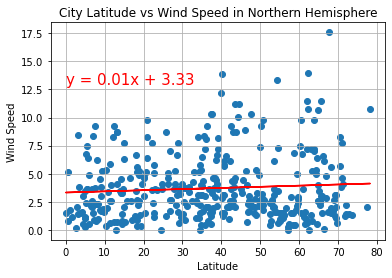

In [83]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(0,13), fontsize=15, color="red")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Wind Speed in Northern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid()
print(f'R value: {rvalue}')

R value: -0.19414546798270246


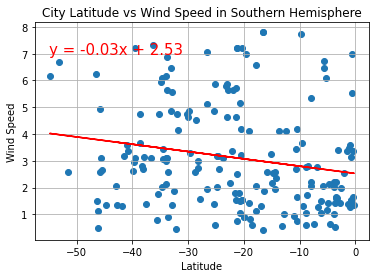

In [85]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,7), fontsize=15, color="red")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Wind Speed in Southern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid()
print(f'R value: {rvalue}')

**Discussion about the linear relationship:** There is no significant correlation between wide speed and latitude in the northern or southern hemisphere.